# ARCH Model Volatility Forecasting

In [2]:
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [3]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

In [4]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  1 of 1 completed
Downloaded 1006 rows of data.


Average return: 0.08%


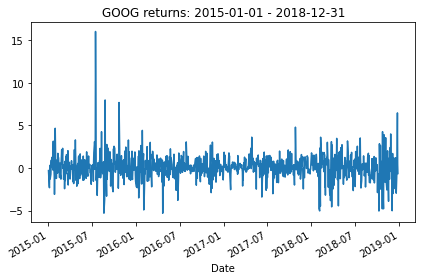

In [5]:
# Calculate daily returns

returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}');

plt.tight_layout()
# plt.savefig('images/ch5_im1.png')
plt.show()

In [6]:
# Specify the ARCH model

model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [7]:
# Estimate model and print summary
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1800.60
Distribution:                  Normal   AIC:                           3605.19
Method:            Maximum Likelihood   BIC:                           3615.02
                                        No. Observations:                 1005
Date:                Wed, Aug 17 2022   Df Residuals:                     1005
Time:                        10:59:33   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6323      0.167      9.794  1.193e-22   [  1.30

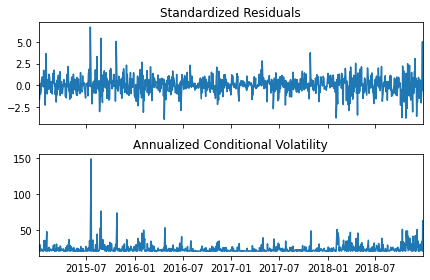

In [8]:
# Plot residuals and the conditional volaitlity

model_fitted.plot(annualize='D') #annualize the conditional volatility series from daily data

plt.tight_layout()
# plt.savefig('images/ch5_im3.png')
plt.show()

# GARCH Model Volatility

Generalized Autoregressive Conditional Heteroskedasticity (GARCH)
can be considered an ARMA model applied to the variance of a time series—the AR
component was already expressed in the ARCH model, while GARCH additionally adds
the moving average part. In other words, the ARCH model specifies the conditional
variance as a linear function of past sample variances, while the GARCH model adds
lagged conditional variances to the specification.

The two hyperparameters of the GARCH model can be described as:
- p: The number of lag variances
- q: The number of lag residual errors from a mean process

In [9]:
model = arch_model(returns, mean='Zero', vol='GARCH', 
                   p=1, o=0, q=1)

In [10]:
# Estimate model and print summary

model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1764.88
Distribution:                  Normal   AIC:                           3535.75
Method:            Maximum Likelihood   BIC:                           3550.49
                                        No. Observations:                 1005
Date:                Wed, Aug 17 2022   Df Residuals:                     1005
Time:                        10:59:56   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1781      0.157      1.134      0.257    [ -

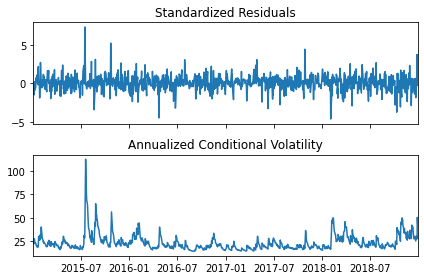

In [11]:
# Plot residuals and conditional volatility

model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im5.png')
plt.show()

When using ARCH, the conditional volatility series exhibits many spikes, and
then immediately returns to the low level. In the case of GARCH, as the model
also includes lagged conditional volatility, it takes more time to return to the level
observed before the spike

There are numerous extensions to the GARCH framework. Some popular models include:

- GJR-GARCH: A variant of the GARCH model that takes into account the asymmetry of the returns (negative returns tend to have a stronger impact on
volatility than positive ones)
- EGARCH: Exponential GARCH
- TGARCH: Threshold GARCH
- FIGARCH: Fractionally integrated GARCH, used with non-stationary data
- GARCH-MIDAS: In this class of models, volatility is decomposed into a shortterm GARCH component and a long-term component driven by an additional
explanatory variable
- Multivariate GARCH models, such as CCC-/DCC-GARCH

The first three models use slightly different approaches to introduce asymmetry into the conditional volatility specification. This is in line with the belief that negative shocks have a
stronger impact on volatility than positive shocks.